# PROJETO 2

## ENTROPY OF WRITTEN ENGLISH 
Calcular e interpretar a Entropia de um texto em inglês


In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import requests
import re
import string

In [2]:
# get raw text from internet
book = requests.get('https://www.gutenberg.org/files/35/35-0.txt')

In [3]:
book

<Response [200]>

In [4]:
# extract just the text and have a look at it

text = book.text
print(type(text))
print(len(text))

<class 'str'>
202581


In [5]:
text[:250]

'\ufeffThe Project Gutenberg eBook of The Time Machine, by H. G. Wells\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it '

In [6]:
# character strings to replace with space
strings2replace = ["\ufeff",         # beginning
                 '\r\n\r\nâ\x80\x9c', # new paragraph
                 'â\x80\x9c',         # open quote
                 'â\x80\x9d',         # close quote
                 '\r\n',              # new line
                 'â\x80\x94',         # hyphen
                 'â\x80\x99',         # single apostrophe
                 'â\x80\x98',         # single quote
                 '_',                 # underscore, used for stressing
                 ]

In [8]:
# use regular expression (re) to replace those strings with space

for str2match in strings2replace:
  regexp = re.compile(r'%s'%str2match)
  text = regexp.sub(' ',text)


# let's have a look!
text[:1000]

' The Project Gutenberg eBook of The Time Machine, by H. G. Wells  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  Title: The Time Machine  Author: H. G. Wells  Release Date: July, 1992 [eBook #35] [Most recently updated: October 22, 2020]  Language: English  Character set encoding: UTF-8   *** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***     The Time Machine  An Invention  by H. G. Wells   CONTENTS   I Introduction  II The Machine  III The Time Traveller Returns  IV Time Travelling  V In the Golden Age  VI The Sunset of Mankind  VII A Sudden Shock  VIII Explanation  IX The Morlocks  

In [9]:
# convert to words
words = text.split()

print(type(words))
print(len(words))
words[:30]

<class 'list'>
35520


['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'The',
 'Time',
 'Machine,',
 'by',
 'H.',
 'G.',
 'Wells',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'United',
 'States',
 'and',
 'most',
 'other',
 'parts',
 'of']

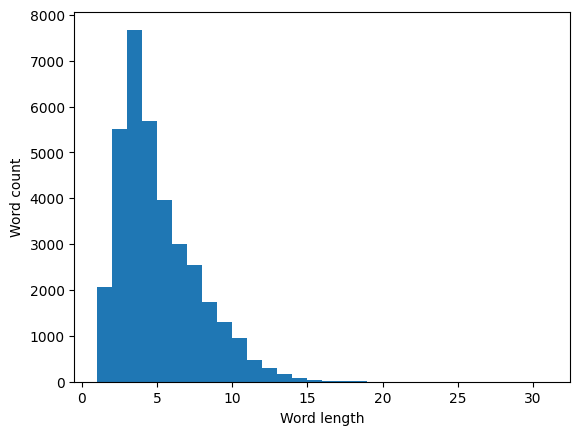

In [10]:
# initialize word lengths
wordlengths = np.zeros(len(words))

# loop over words and get length
for wordi in range(len(words)):
  wordlengths[wordi] = len(words[wordi])

# show in a plot
plt.hist(wordlengths,bins=30)
plt.xlabel('Word length')
plt.ylabel('Word count')
plt.show()

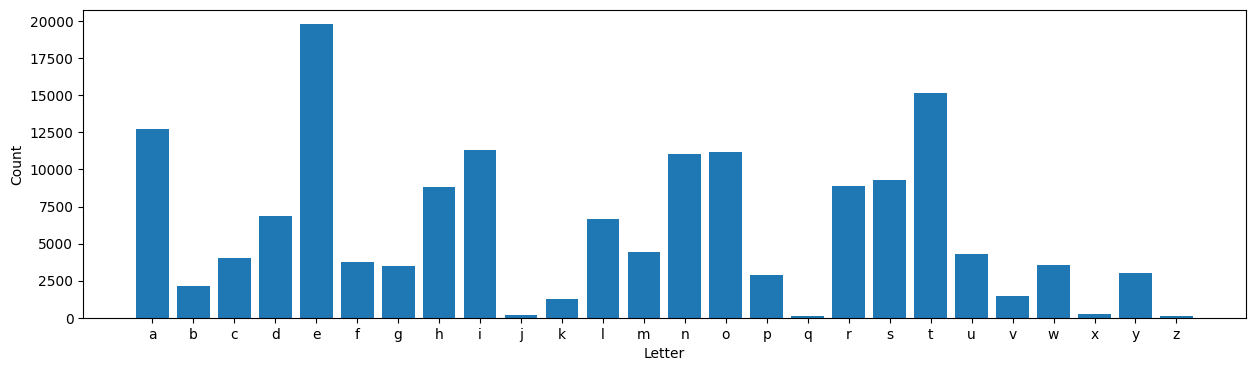

In [11]:
# now repeat for letter frequencies

letters = string.ascii_lowercase
numLetters = len(letters)
lettercounts = np.zeros(numLetters)

n = 0
for i in letters:
  lettercounts[n] = text.lower().count(i)
  n += 1


fig,ax = plt.subplots(1,figsize=(15,4))
ax.bar(range(numLetters),lettercounts)
ax.set_xticks(range(numLetters))
ax.set_xticklabels(letters)
ax.set_xlabel('Letter')
ax.set_ylabel('Count')
plt.show()

0.9999999999999997


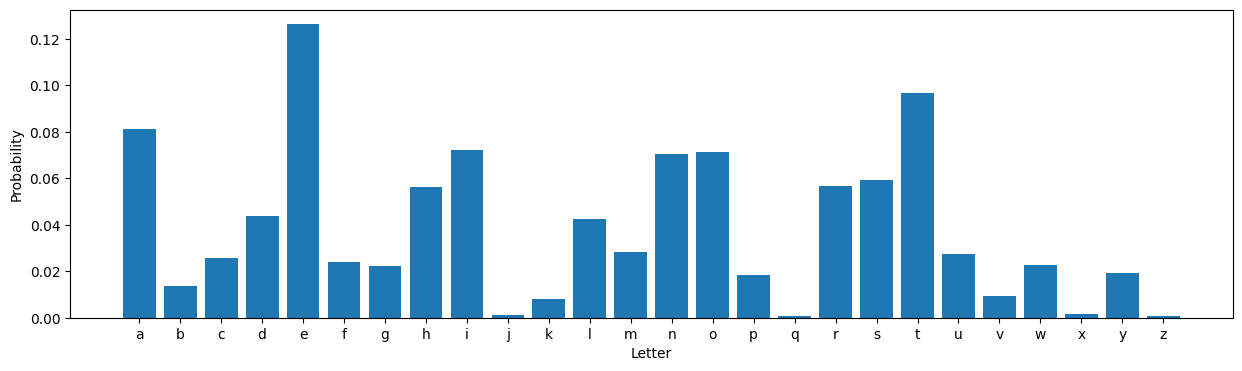

In [12]:
# compute entropy of letters

# convert frequency to probability
letterprob = lettercounts / sum(lettercounts)

# must sum to 1
print(sum(letterprob))

# show it
fig,ax = plt.subplots(1,figsize=(15,4))
ax.bar(range(numLetters),letterprob)
ax.set_xticks(range(numLetters))
ax.set_xticklabels(letters)
ax.set_xlabel('Letter')
ax.set_ylabel('Probability')
fig;

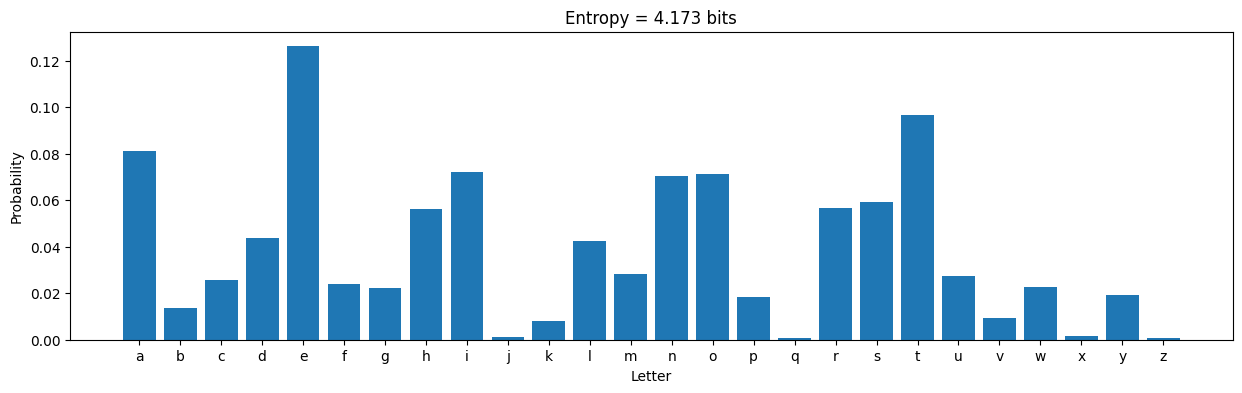

In [13]:
# compute overall entropy and re-plot

entropy = -sum( letterprob * np.log2(letterprob+np.finfo(float).eps) )

ax.set_title('Entropy = %.3f bits'%entropy)
fig

### Conditional Entropy

In [14]:
# now for conditional entropy

# initialize matrix
probmat = np.zeros((numLetters,numLetters))

# loop through letters
for i in range(len(text)-1):

  # get the current characters
  currlet = text[i].lower()
  nextlet = text[i+1].lower()

  # consider only if this and following characters are actually letters
  if currlet in letters and nextlet in letters:
    probmat[letters.index(currlet),letters.index(nextlet)] += 1


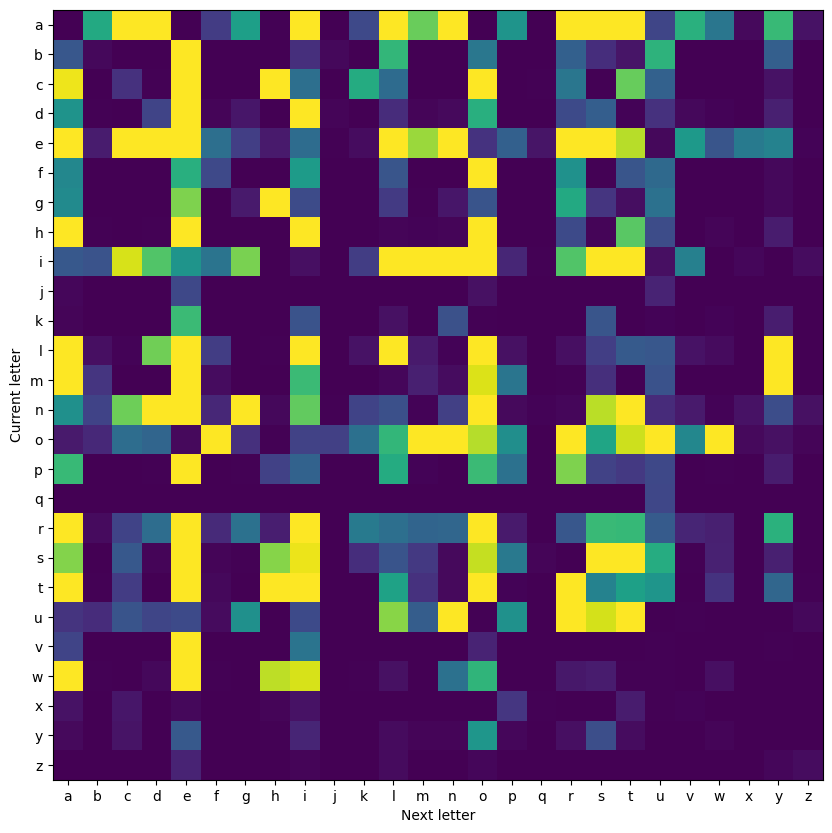

In [15]:
# show the matrix!

fig,ax = plt.subplots(1,figsize=(10,10))

ax.imshow(probmat,vmax=500)
ax.set_ylabel('Current letter')
ax.set_xlabel('Next letter')
ax.set_xticks(range(numLetters))
ax.set_yticks(range(numLetters))
ax.set_xticklabels(letters)
ax.set_yticklabels(letters)
plt.show()

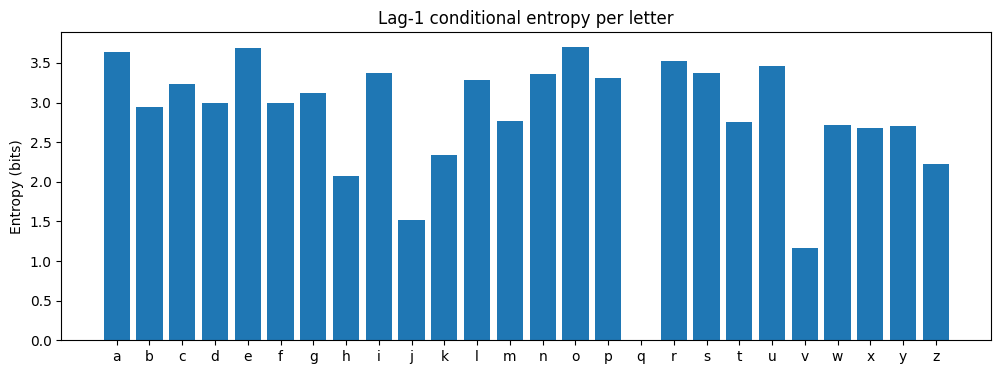

In [16]:
# now compute conditional entropy

condentr = np.zeros(numLetters)

for i in range(numLetters):
  probs = probmat[i,:]
  probs = probs / sum(probs)
  condentr[i] = -sum(probs*np.log2(probs+np.finfo(float).eps))


fig,ax = plt.subplots(1,figsize=(12,4))
ax.bar(range(numLetters),condentr)
ax.set_xticks(range(numLetters))
ax.set_xticklabels(letters)
ax.set_ylabel('Entropy (bits)')
ax.set_title('Lag-1 conditional entropy per letter')
plt.show()